In [3]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import factorial, sqrt, pi
np.random.seed(42)

Bernoulli sample mean (approx p): 0.2887
Bernoulli sample var (approx p(1-p)): 0.20535231000000004

Normal sample mean (approx mu): 2.0185330937808708
Normal sample var (approx sigma^2): 2.2487603282724753


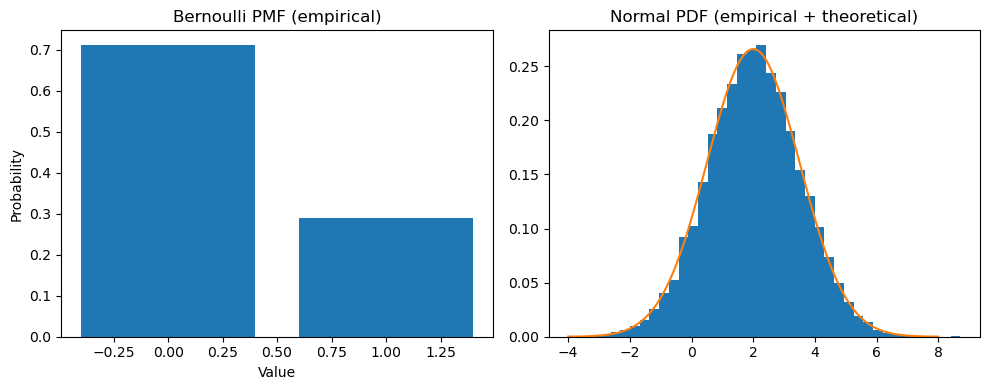

In [4]:
# Bernoulli (discrete) example
p = 0.3
n_samples = 10000
bern = np.random.binomial(1, p, size=n_samples)  # Bernoulli as Binomial(n=1)
print('Bernoulli sample mean (approx p):', bern.mean())
print('Bernoulli sample var (approx p(1-p)):', bern.var())

# Normal (continuous) example
mu, sigma = 2.0, 1.5
norm_samples = np.random.normal(mu, sigma, size=n_samples)
print('\nNormal sample mean (approx mu):', norm_samples.mean())
print('Normal sample var (approx sigma^2):', norm_samples.var())

# Plot PDFs / PMFs
fig, axes = plt.subplots(1,2, figsize=(10,4))
# Bernoulli PMF
vals, counts = np.unique(bern, return_counts=True)
axes[0].bar(vals, counts/len(bern))
axes[0].set_title('Bernoulli PMF (empirical)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Probability')

# Normal PDF (empirical histogram + theoretical PDF)
axes[1].hist(norm_samples, bins=40, density=True)
x = np.linspace(mu-4*sigma, mu+4*sigma, 200)
axes[1].plot(x, stats.norm.pdf(x, mu, sigma))
axes[1].set_title('Normal PDF (empirical + theoretical)')
plt.tight_layout()
plt.show()

Binomial theoretical mean, var: 4.0 2.4
Poisson theoretical mean,var: 3.0 3.0


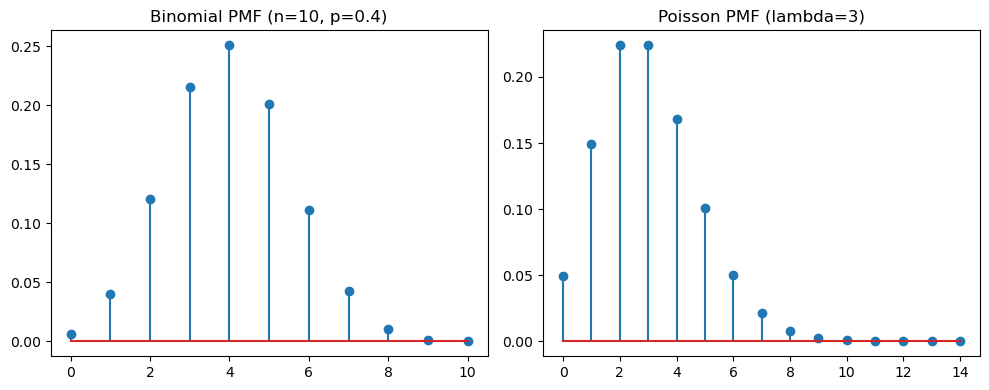

In [5]:
# Binomial example (n, p)
n, p = 10, 0.4
k = np.arange(0, n+1)
pmf_binom = stats.binom.pmf(k, n, p)

print('Binomial theoretical mean, var:', stats.binom.mean(n, p), stats.binom.var(n, p))

# Poisson example
lam = 3.0
k_p = np.arange(0, 15)
pmf_pois = stats.poisson.pmf(k_p, lam)
print('Poisson theoretical mean,var:', stats.poisson.mean(lam), stats.poisson.var(lam))

# Plot PMFs
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].stem(k, pmf_binom)
ax[0].set_title('Binomial PMF (n=10, p=0.4)')
ax[1].stem(k_p, pmf_pois)
ax[1].set_title('Poisson PMF (lambda=3)')
plt.tight_layout()
plt.show()

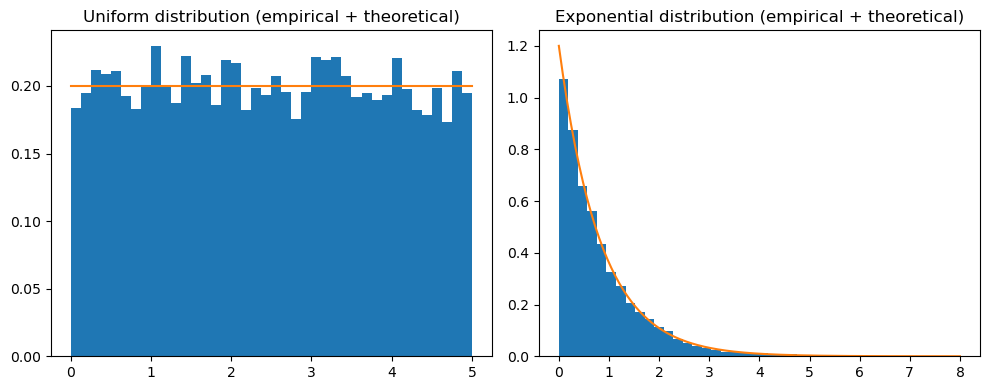

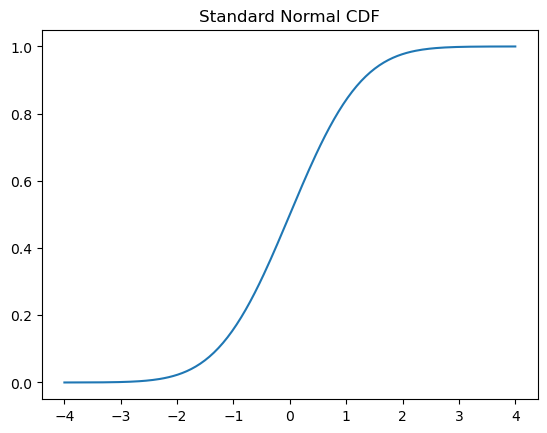

In [6]:
# Uniform(a,b)
a, b = 0, 5
uni_samps = np.random.uniform(a, b, size=10000)
x = np.linspace(a, b, 200)
# Exponential
lam = 1.2
exp_samps = np.random.exponential(1/lam, size=10000)
x_exp = np.linspace(0, 8, 200)

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].hist(uni_samps, bins=40, density=True)
ax[0].plot(x, stats.uniform.pdf(x, a, b-a))
ax[0].set_title('Uniform distribution (empirical + theoretical)')

ax[1].hist(exp_samps, bins=40, density=True)
ax[1].plot(x_exp, stats.expon.pdf(x_exp, scale=1/lam))
ax[1].set_title('Exponential distribution (empirical + theoretical)')
plt.tight_layout()
plt.show()

# Normal shown previously; we can show standard normal CDF example
xs = np.linspace(-4,4,200)
plt.plot(xs, stats.norm.cdf(xs))
plt.title('Standard Normal CDF')
plt.show()